In [56]:
import json
import os
import pickle
from sklearn.model_selection import train_test_split

In [36]:
encoder = None
encoders = {}
labelsDescription = {}
skinType = None
isSensitive = None
mainProblem = None
secondProblem = None
age = None
resultSkinCare = {}
models = {}
accuracy = {}
products = {}
link = None
chosenProduct = None

accuracyDecisionTree = {}
accuracyKNN = {}
accuracyRandomForest = {}

allAccuracy = {}

askedColumnNames = ['Typ cery', 'Główny problem', 'Poboczny problem', 'Wrażliwa','Wiek']
categoricalColumnNames = ['Typ cery', 'Główny problem', 'Poboczny problem']
DECISION_COLUMN_NAMES = ['Mycie','Serum na dzień','Krem na dzień','SPF','Serum na noc','Krem na noc','Punktowo','Maseczka','Peeling']
allColumns = askedColumnNames + DECISION_COLUMN_NAMES
allCategoricalColumns = categoricalColumnNames + DECISION_COLUMN_NAMES

In [37]:
with open('accuracy.json') as json_file:
    data = json.load(json_file)
    for key in data:
        accuracy[key] = data[key]

for key in accuracy:
    print(key, accuracy[key])

Mycie 0.16168582375478927
Serum na dzień 0.21915708812260537
Krem na dzień 0.1731800766283525
SPF 0.3057471264367816
Serum na noc 0.3095785440613027
Krem na noc 0.1478927203065134
Punktowo 0.41839080459770117
Maseczka 0.3003831417624521
Peeling 0.3333333333333333


In [102]:
with open('accuracy_of_DecisionTreeClassifier.json') as json_file:
    data = json.load(json_file)
    for key in data:
        accuracyDecisionTree[key] = data[key]

#print accuracyDecisionTree and round it to 2 decimal places and add % sign
for key in accuracyDecisionTree:
    print(accuracyDecisionTree[key])


0.16628352490421455
0.2053639846743295
0.16704980842911876
0.29042145593869734
0.296551724137931
0.13946360153256704
0.43984674329501916
0.2842911877394636
0.3095785440613027


In [103]:
with open('accuracy_of_KNeighborsClassifier.json') as json_file:
    data = json.load(json_file)
    for key in data:
        accuracyKNN[key] = data[key]

#print accuracyDecisionTree and round it to 2 decimal places and add % sign
for key in accuracyKNN:
    print(accuracyKNN[key])

0.1724137931034483
0.20229885057471264
0.16168582375478927
0.26513409961685824
0.25210727969348656
0.14329501915708812
0.42605363984674327
0.3103448275862069
0.32567049808429116


In [105]:
with open('accuracy_of_RandomForestClassifier.json') as json_file:
    data = json.load(json_file)
    for key in data:
        accuracyRandomForest[key] = data[key]

for key in accuracyRandomForest:
    print(accuracyRandomForest[key])

0.18084291187739462
0.22375478927203066
0.17701149425287357
0.30191570881226054
0.2996168582375479
0.16168582375478927
0.4467432950191571
0.32950191570881227
0.3333333333333333


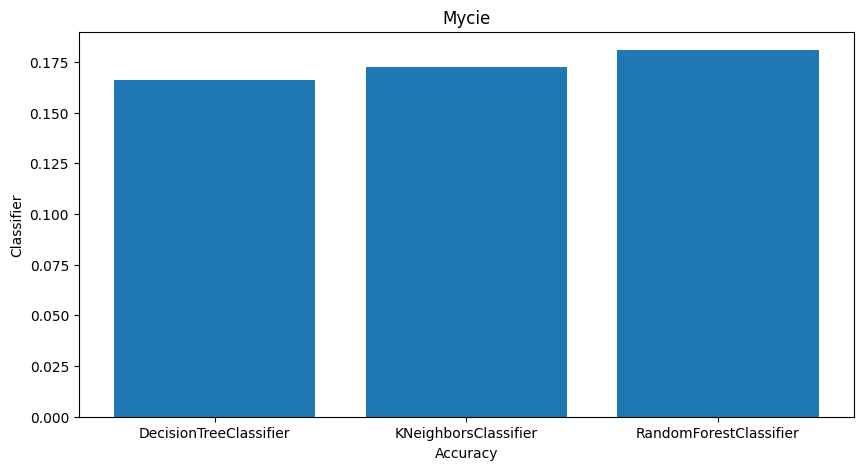

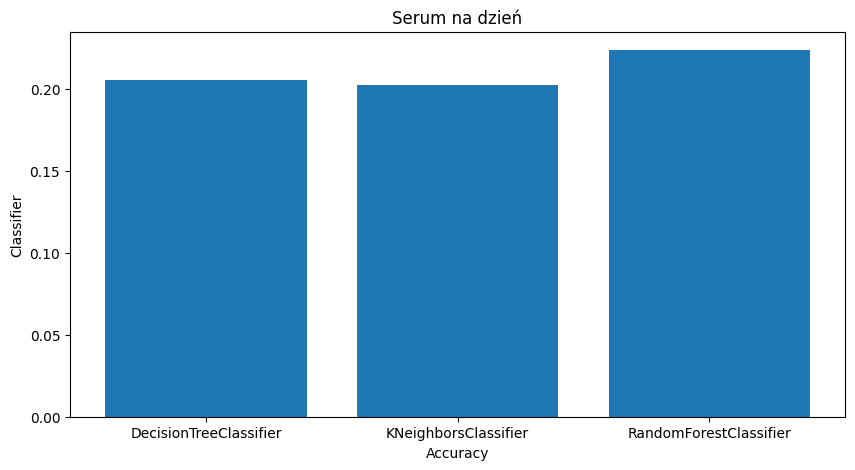

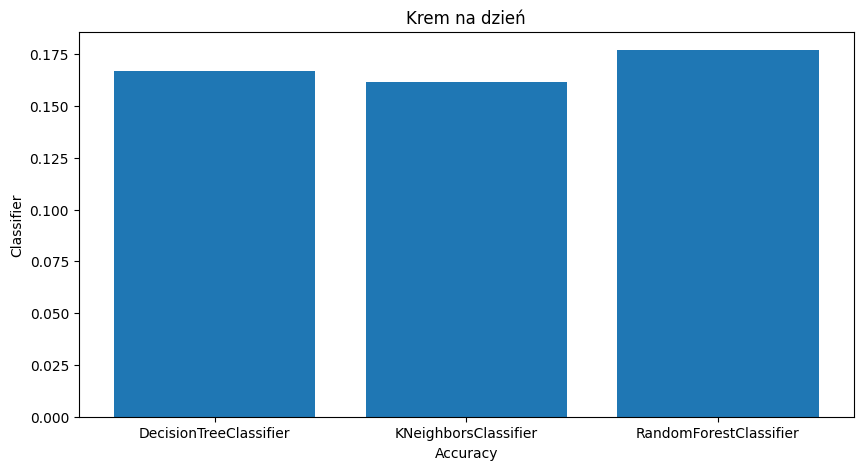

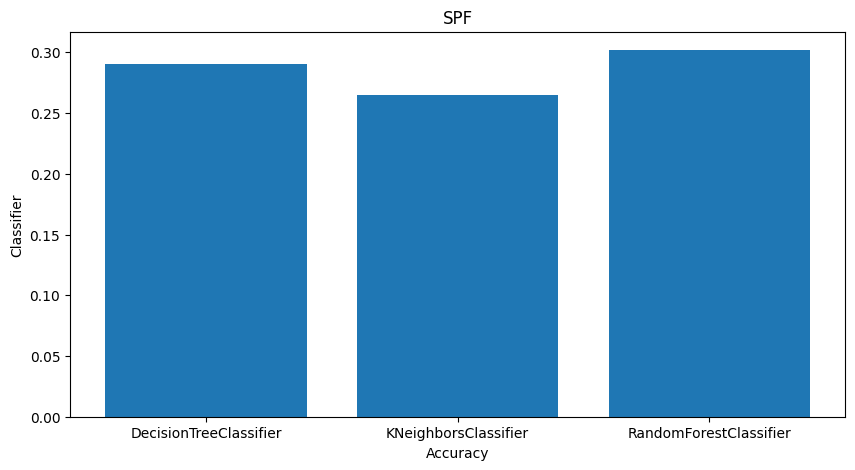

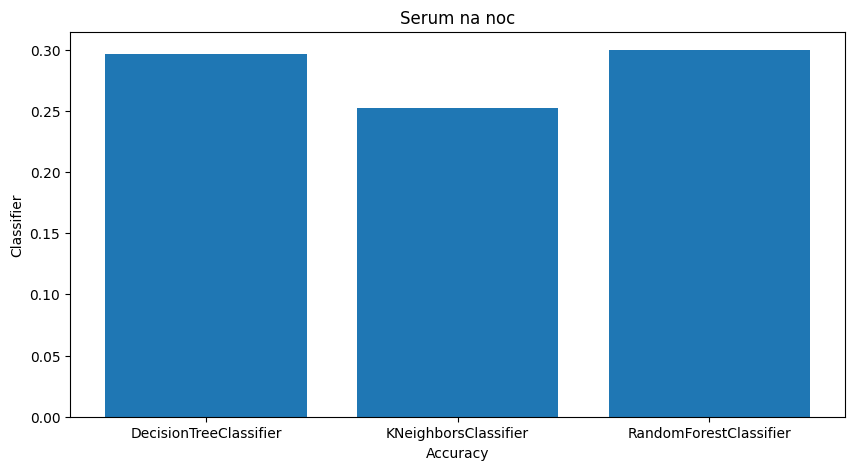

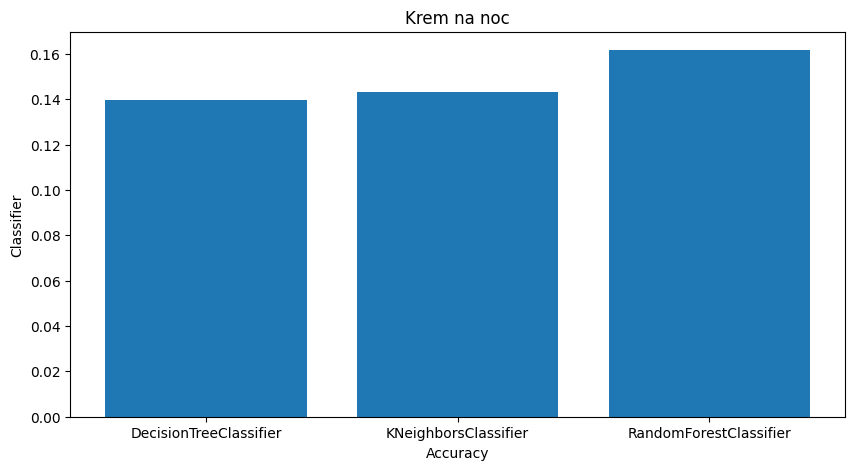

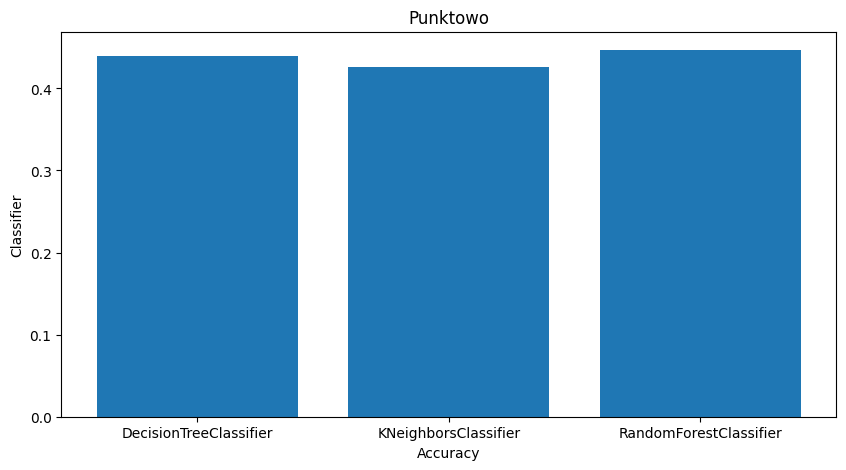

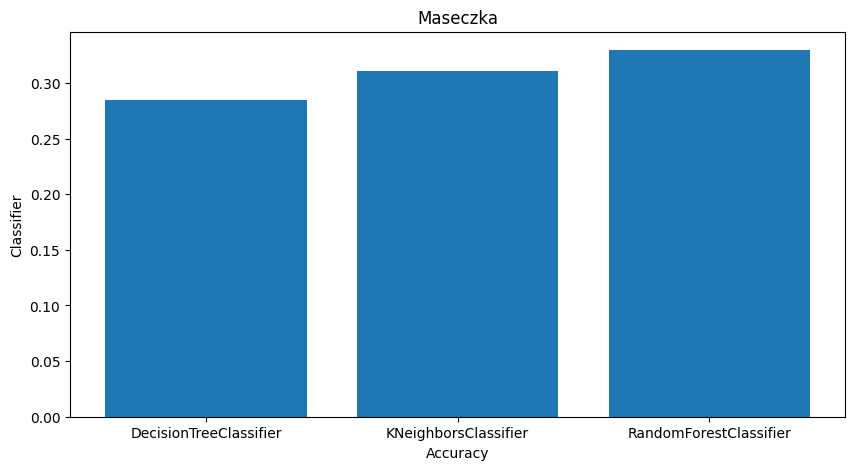

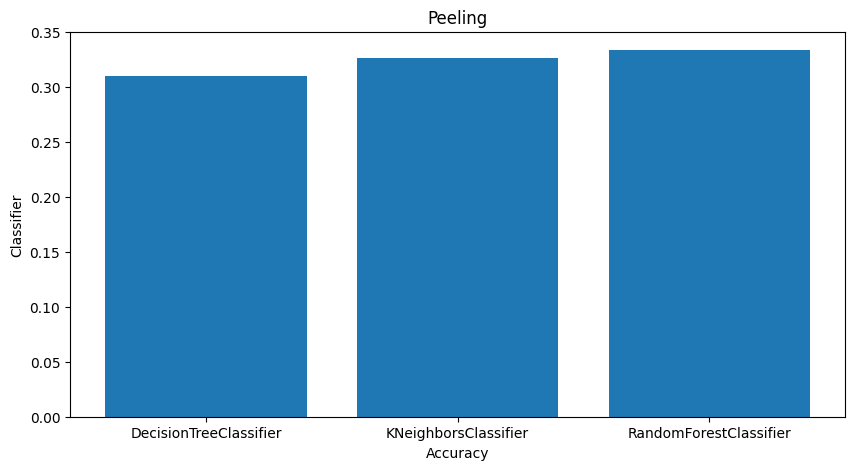

In [107]:
for key in accuracyDecisionTree:
    #make graph with accuracy of DecisionTreeClassifier, knn and RandomForestClassifier
    allAccuracy[key] = [accuracyDecisionTree[key], accuracyKNN[key], accuracyRandomForest[key]]

#create graph of allAccuracy
import matplotlib.pyplot as plt
import numpy as np

#for each problem create graph
for key in allAccuracy:
    #create graph
    plt.figure(figsize=(10, 5))
    plt.title(key)
    plt.xlabel('Accuracy')
    plt.ylabel('Classifier')
    plt.bar(['DecisionTreeClassifier', 'KNeighborsClassifier', 'RandomForestClassifier'], allAccuracy[key])
    plt.show()

In [41]:
def read_models_for_analysis(filename, i):
    temp_dict = {}
    with open("models_for_analysis/{0}/{1}".format(i, filename), "rb") as file:
        temp_dict[filename] = pickle.load(file)
    return temp_dict

In [49]:
#read every file from models_for_analysis and save it to models
for i in range(9):
    temp_list = []
    for filename in os.listdir('models_for_analysis\{0}'.format(i)):
        temp_list.append(read_models_for_analysis(filename, i))
    models[i] = temp_list
models

{0: [{'DecisionTreeClassifier.hdf5': DecisionTreeClassifier(max_depth=4, min_samples_leaf=9, min_samples_split=7)},
  {'KNeighborsClassifier.hdf5': KNeighborsClassifier(metric='euclidean', n_neighbors=13)},
  {'RandomForestClassifier.hdf5': RandomForestClassifier(criterion='entropy', max_depth=26, max_features='log2',
                          min_samples_leaf=10, min_samples_split=7,
                          n_estimators=900)}],
 1: [{'DecisionTreeClassifier.hdf5': DecisionTreeClassifier(max_depth=4, min_samples_leaf=2)},
  {'KNeighborsClassifier.hdf5': KNeighborsClassifier(metric='euclidean', n_neighbors=15)},
  {'RandomForestClassifier.hdf5': RandomForestClassifier(max_depth=44, min_samples_leaf=7, min_samples_split=9,
                          n_estimators=700)}],
 2: [{'DecisionTreeClassifier.hdf5': DecisionTreeClassifier(max_depth=4, min_samples_leaf=8, min_samples_split=8)},
  {'KNeighborsClassifier.hdf5': KNeighborsClassifier(metric='manhattan', n_neighbors=17)}],
 3: [{'Decis

In [51]:
#read labeledDataset.csv and save it to labeledDataset
import pandas as pd
labeledDataset = pd.read_csv('labeledDataset.csv')
labeledDataset

,Typ cery,Wrażliwa,Główny problem,Poboczny problem,Wiek,Mycie,Serum na dzień,Krem na dzień,SPF,Serum na noc,Krem na noc,Punktowo,Maseczka,Peeling
0,3,0,0,2,17,16,12,19,12,4,15,1,10,2
1,0,1,0,2,20,19,12,2,5,11,15,1,9,0
2,0,1,0,2,20,19,12,10,5,11,9,1,9,0
3,3,1,1,4,20,1,2,1,5,1,4,0,9,0
4,0,1,1,3,17,6,12,1,13,7,3,1,9,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5213,2,1,6,3,16,13,7,7,10,7,10,1,7,1
5214,3,0,7,6,22,21,2,10,5,7,0,1,7,2
5215,0,1,2,0,21,6,12,8,7,12,14,0,2,7
5216,3,0,1,3,23,15,8,4,7,12,18,0,10,0


In [89]:
from sklearn.metrics import classification_report

In [74]:
def get_problem_column_index(problemName):
    '''
    Funkcja zwraca indeks kolumny z danym problemem.
    '''
    if problemName == 'Mycie':
        return 5
    elif problemName == 'Serum na dzień':
        return 6
    elif problemName == 'Krem na dzień':
        return  7
    elif problemName == 'SPF' :
        return  8
    elif problemName == 'Serum na noc':
        return  9
    elif problemName == 'Krem na noc':
        return  10
    elif problemName == 'Punktowo':
        return  11
    elif problemName == 'Maseczka':
        return  12
    elif problemName == 'Peeling':
        return  13
    else :
        raise ValueError("Nie rozpoznano kategorii produktu.")

In [90]:
def get_info_about_model(problemName, classifier):
    problemIndex = get_problem_column_index(problemName)
    X = labeledDataset.values[:, 0:5]
    yProblem = labeledDataset.values[:, problemIndex]
    X_train, X_test, y_train, y_test = train_test_split(X, yProblem, test_size = 0.25)
    if classifier == "DecisionTreeClassifier.hdf5":
        model = models[problemIndex-5][0]
    elif classifier == "KNeighborsClassifier.hdf5":
        model = models[problemIndex-5][1]
    elif classifier == "RandomForestClassifier.hdf5":
        model = models[problemIndex-5][2]

    model = model[classifier]
    
    #get roc curve
    y_score = model.predict(X_test)
    #get f1 score
    return classification_report(y_test, y_score)

    #return roc_auc_score(y_test, y_score, average="weighted", multi_class="ovr")
classifiers = ["DecisionTreeClassifier.hdf5", "KNeighborsClassifier.hdf5", "RandomForestClassifier.hdf5"]

# for each classifier get f1 score for each problem
for classifier in classifiers:
    print(classifier)
    for problem in DECISION_COLUMN_NAMES:
        print(problem, get_info_about_model(problem, classifier))
    print("-------------------")

DecisionTreeClassifier.hdf5
Mycie               precision    recall  f1-score   support

           0       0.14      0.17      0.15        12
           1       0.21      0.65      0.32       175
           2       0.17      0.09      0.12        11
           3       0.00      0.00      0.00        72
           4       0.00      0.00      0.00        33
           5       0.00      0.00      0.00        25
           6       0.00      0.00      0.00        73
           7       0.00      0.00      0.00        31
           8       0.00      0.00      0.00         9
           9       0.00      0.00      0.00        13
          10       0.00      0.00      0.00         6
          11       0.00      0.00      0.00        28
          12       0.00      0.00      0.00        34
          13       0.12      0.12      0.12       138
          14       0.00      0.00      0.00        12
          15       0.08      0.34      0.14       100
          16       0.00      0.00      0.00    

c:\Users\CEM\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\CEM\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\CEM\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\CEM\anaconda3\lib\site-packages\sklearn\metrics\_cla

SPF               precision    recall  f1-score   support

           0       0.00      0.00      0.00        84
           1       0.00      0.00      0.00        14
           2       0.00      0.00      0.00        13
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00        45
           5       0.20      0.21      0.21       243
           6       0.00      0.00      0.00         8
           7       0.29      0.85      0.43       333
           8       0.00      0.00      0.00         5
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00        20
          11       0.00      0.00      0.00        26
          12       0.21      0.07      0.10       237
          13       0.00      0.00      0.00       171
          14       0.00      0.00      0.00        23
          15       0.00      0.00      0.00        73

    accuracy                           0.27      1305
   macro avg       0.0

c:\Users\CEM\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Peeling               precision    recall  f1-score   support

           0       0.30      0.37      0.33        93
           1       0.49      0.74      0.59       322
           2       0.34      0.39      0.36       230
           3       0.00      0.00      0.00         9
           4       0.32      0.21      0.26       155
           5       0.39      0.24      0.30       157
           6       0.50      0.04      0.08        24
           7       0.41      0.36      0.38       271
           8       0.00      0.00      0.00        12
           9       0.00      0.00      0.00        32

    accuracy                           0.41      1305
   macro avg       0.27      0.24      0.23      1305
weighted avg       0.38      0.41      0.38      1305

-------------------
KNeighborsClassifier.hdf5
Mycie               precision    recall  f1-score   support

           0       0.09      0.12      0.11         8
           1       0.26      0.58      0.36       175
           2      

c:\Users\CEM\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\CEM\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\CEM\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Serum na dzień               precision    recall  f1-score   support

           0       0.21      0.33      0.26       136
           1       0.21      0.21      0.21        29
           2       0.14      0.26      0.18        92
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00        25
           5       0.00      0.00      0.00        10
           6       0.38      0.11      0.17        27
           7       0.36      0.60      0.45       208
           8       0.30      0.31      0.30       228
           9       0.17      0.04      0.06        25
          10       0.00      0.00      0.00        27
          11       0.10      0.03      0.05        61
          12       0.28      0.23      0.26       196
          13       0.18      0.12      0.14       134
          14       0.00      0.00      0.00         4
          15       0.33      0.06      0.10        17
          16       0.00      0.00      0.00        23
          17

c:\Users\CEM\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\CEM\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\CEM\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Krem na dzień               precision    recall  f1-score   support

           0       0.17      0.16      0.17        62
           1       0.23      0.54      0.33       199
           2       0.15      0.15      0.15       110
           3       0.25      0.04      0.07        26
           4       0.24      0.12      0.16        90
           5       0.00      0.00      0.00         7
           6       0.10      0.07      0.08        45
           7       0.50      0.03      0.06        29
           8       0.21      0.23      0.22       130
           9       1.00      0.06      0.11        17
          10       0.24      0.34      0.28       154
          11       0.20      0.16      0.18       119
          12       0.00      0.00      0.00        13
          13       0.00      0.00      0.00         6
          14       0.00      0.00      0.00         8
          15       0.00      0.00      0.00         9
          16       0.00      0.00      0.00        10
          17 

c:\Users\CEM\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\CEM\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\CEM\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SPF               precision    recall  f1-score   support

           0       0.14      0.05      0.08        76
           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00        11
           3       0.00      0.00      0.00        11
           4       0.00      0.00      0.00        32
           5       0.27      0.36      0.31       203
           6       0.00      0.00      0.00         7
           7       0.36      0.67      0.47       373
           8       0.00      0.00      0.00         4
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00        28
          11       0.00      0.00      0.00        25
          12       0.35      0.26      0.30       247
          13       0.41      0.20      0.26       179
          14       0.00      0.00      0.00        13
          15       0.22      0.06      0.09        83

    accuracy                           0.33      1305
   macro avg       0.1

c:\Users\CEM\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\CEM\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\CEM\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Serum na noc               precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.00      0.00      0.00        32
           2       0.27      0.28      0.28       168
           3       0.00      0.00      0.00        32
           4       0.24      0.27      0.25       206
           5       0.28      0.24      0.26       197
           6       0.00      0.00      0.00        18
           7       0.14      0.04      0.06        81
           8       0.00      0.00      0.00         9
           9       0.00      0.00      0.00        13
          10       0.00      0.00      0.00        16
          11       0.25      0.09      0.14       138
          12       0.37      0.64      0.47       384

    accuracy                           0.31      1305
   macro avg       0.12      0.12      0.11      1305
weighted avg       0.26      0.31      0.27      1305



c:\Users\CEM\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\CEM\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\CEM\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Krem na noc               precision    recall  f1-score   support

           0       0.21      0.27      0.23       110
           1       0.18      0.17      0.17        30
           2       0.09      0.04      0.05        27
           3       0.18      0.24      0.21       110
           4       0.00      0.00      0.00        22
           5       0.24      0.43      0.30       187
           6       0.00      0.00      0.00         4
           7       0.18      0.08      0.11        84
           8       0.00      0.00      0.00        12
           9       0.17      0.30      0.22       139
          10       0.00      0.00      0.00        31
          11       0.00      0.00      0.00        11
          12       0.00      0.00      0.00        14
          13       0.00      0.00      0.00        28
          14       0.15      0.08      0.11        86
          15       0.00      0.00      0.00        32
          16       0.19      0.20      0.20       119
          17   

c:\Users\CEM\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\CEM\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\CEM\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Punktowo               precision    recall  f1-score   support

           0       0.25      0.17      0.20       202
           1       0.49      0.91      0.64       539
           2       0.33      0.17      0.22       148
           3       0.00      0.00      0.00        12
           4       0.25      0.04      0.07        47
           5       0.00      0.00      0.00        20
           6       0.22      0.07      0.11       156
           7       0.21      0.05      0.08        97
           8       0.00      0.00      0.00        23
           9       0.00      0.00      0.00        12
          10       0.00      0.00      0.00        10
          11       0.00      0.00      0.00        24
          12       0.00      0.00      0.00        15

    accuracy                           0.44      1305
   macro avg       0.13      0.11      0.10      1305
weighted avg       0.33      0.44      0.34      1305



c:\Users\CEM\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\CEM\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\CEM\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Maseczka               precision    recall  f1-score   support

           0       0.17      0.08      0.11        12
           1       0.20      0.17      0.18        90
           2       0.28      0.23      0.25       209
           3       0.00      0.00      0.00        10
           4       0.00      0.00      0.00        15
           5       0.30      0.23      0.26       142
           6       0.20      0.05      0.08        20
           7       0.41      0.72      0.53       355
           8       0.23      0.12      0.15        78
           9       0.32      0.29      0.31       275
          10       0.23      0.08      0.12        89
          11       0.00      0.00      0.00        10

    accuracy                           0.34      1305
   macro avg       0.20      0.16      0.17      1305
weighted avg       0.31      0.34      0.31      1305



c:\Users\CEM\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\CEM\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\CEM\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Peeling               precision    recall  f1-score   support

           0       0.25      0.22      0.23       103
           1       0.48      0.73      0.58       316
           2       0.36      0.33      0.34       260
           3       0.00      0.00      0.00        12
           4       0.33      0.35      0.34       133
           5       0.28      0.16      0.21       155
           6       0.00      0.00      0.00        18
           7       0.36      0.36      0.36       266
           8       0.00      0.00      0.00        13
           9       0.00      0.00      0.00        29

    accuracy                           0.39      1305
   macro avg       0.21      0.22      0.21      1305
weighted avg       0.35      0.39      0.36      1305

-------------------
RandomForestClassifier.hdf5


c:\Users\CEM\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\CEM\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\CEM\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Mycie               precision    recall  f1-score   support

           0       0.50      0.14      0.22         7
           1       0.31      0.49      0.38       183
           2       1.00      0.09      0.17        11
           3       0.26      0.21      0.23        72
           4       0.19      0.10      0.13        31
           5       0.54      0.19      0.29        36
           6       0.32      0.09      0.15        74
           7       0.64      0.18      0.29        38
           8       0.50      0.12      0.20         8
           9       0.50      0.20      0.29        10
          10       1.00      0.11      0.20         9
          11       0.25      0.03      0.06        29
          12       0.25      0.08      0.12        24
          13       0.30      0.33      0.32       126
          14       1.00      0.06      0.12        16
          15       0.21      0.27      0.24        85
          16       0.33      0.09      0.14        47
          17       0.

c:\Users\CEM\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\CEM\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\CEM\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


IndexError: list index out of range